In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import warnings
from scipy.stats import kstest
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
df = pd.read_csv('2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## NOMOR 1

In [12]:
df[['Generosity','Perceptions of corruption']].mean()

Generosity                   0.184846
Perceptions of corruption    0.110603
dtype: float64

In [13]:
df[['Generosity','Perceptions of corruption']].median()

Generosity                   0.1775
Perceptions of corruption    0.0855
dtype: float64

In [14]:
df[['Generosity','Perceptions of corruption']].mode()

,Generosity,Perceptions of corruption
0,0.153,0.028
1,NaN,0.078
2,NaN,0.089


In [15]:
df[['Generosity','Perceptions of corruption']].var()

Generosity                   0.009073
Perceptions of corruption    0.008937
dtype: float64

In [16]:
df[['Generosity','Perceptions of corruption']].std()

Generosity                   0.095254
Perceptions of corruption    0.094538
dtype: float64

In [17]:
df[['Generosity','Perceptions of corruption']].skew()

Generosity                   0.745942
Perceptions of corruption    1.650410
dtype: float64

## NOMOR 2

Text(0.5, 1.0, 'Distribution by Social support')

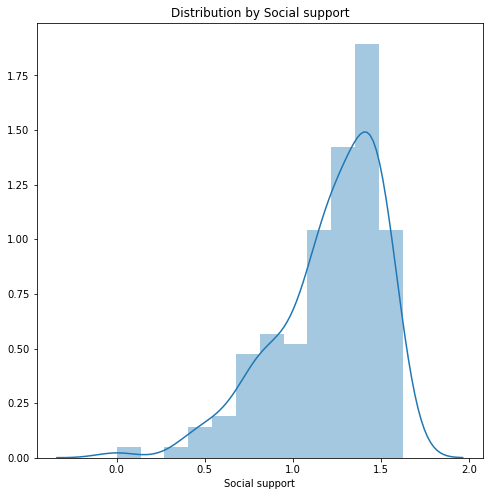

In [37]:
plt.figure(figsize = (8, 8))
sns.distplot(df['Social support'])
plt.title('Distribution by Social support')

In [18]:
ot25 = df['Social support'].quantile(0.25)
ot75 = df['Social support'].quantile(0.75)
iqr = ot75 - ot25
below = ot25 - 1.5 * iqr
above = ot75 + 1.5 * iqr

In [19]:
ot25, ot75, iqr, below, above

(1.05575, 1.4525, 0.39674999999999994, 0.46062500000000006, 2.047625)

In [21]:
outdistance = df[(df['Social support'] < below) | (df['Social support'] > above)]
outdistance

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
101,102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [22]:
df['Social support'].skew()

-1.1347276019487067

Semua Outliers yang ada pada Column Social Support itu semua pada 'Below Q3', dan berpengaruh terhadap social support

## NOMOR 3

In [107]:
?sns.boxplot

Text(0.5, 1.0, 'Checking Outliers')

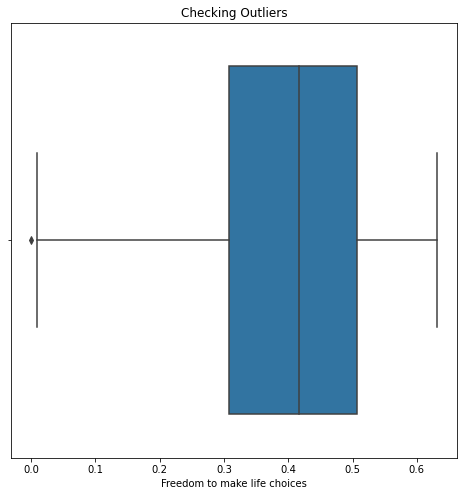

In [23]:
plt.figure(figsize = (8, 8))
sns.boxplot(df['Freedom to make life choices'])
plt.title('Checking Outliers')

## NOMOR 4

In [29]:
stat3, pval3 = kstest(df['GDP per capita'], 'norm')
pval3 < 0.05

True

In [30]:
stat3, pval3 = kstest(df['Social support'], 'norm')
pval3 < 0.05

True

In [31]:
stat3, pval3 = kstest(df['Score'], 'norm')
pval3 < 0.05

True

In [33]:
stat3, pval3 = kstest(df['Healthy life expectancy'], 'norm')
pval3 < 0.05

True

In [34]:
df.corr(method='spearman')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.999999,-0.814430,-0.816125,-0.807279,-0.552014,-0.070484,-0.217240
Score,-0.999999,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348
GDP per capita,-0.814430,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203
Social support,-0.816125,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017
Healthy life expectancy,-0.807279,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309
Freedom to make life choices,-0.552014,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586
Generosity,-0.070484,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171
Perceptions of corruption,-0.217240,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000


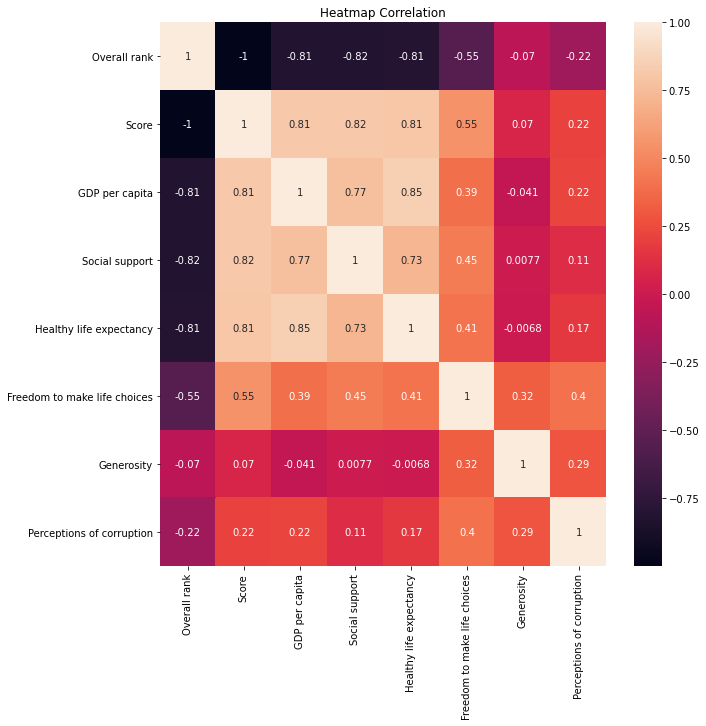

In [36]:
plt.figure(figsize = (10,10))
plt.title ('Heatmap Correlation')
sns.heatmap (df.corr(method='spearman'), annot = True)
plt.savefig('heatmap-cor.jpg')

Menurut nilai korelasi :

    0.0 - 0.3 : weak
    0.3 - 0.7 : medium
    0.7 - 1   : strong

In [39]:
sns.countplot(df = SM, x = SM['Score'])

NameError: name 'SM' is not defined